# Tech Blues Capstone
## First Draft Notebook

In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle
import explore


## Project Overview

For our capstone project, we are going to download the .csv file ‘Mental Health in Tech Survey’ from [Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey).  Once we download the file, we will filter for desirable variables of mental health that could interfere with work (benefits, family history, gender, etc.). We will then follow the steps of the data science pipeline to setup the information for our slides presentation.

## Project Planning

## Data Acquisition

In [7]:
# use our 'get_survey_data' function to bring in the data
df = wrangle.get_survey_data('survey.csv')

----------------------------------------------------
DataFrame Head
   Unnamed: 0            Timestamp  ...  obs_consequence comments
0           0  2014-08-27 11:29:31  ...               No      NaN
1           1  2014-08-27 11:29:37  ...               No      NaN
2           2  2014-08-27 11:29:44  ...               No      NaN

[3 rows x 28 columns]
----------------------------------------------------
DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 1259 non-null   int64 
 1   Timestamp                  1259 non-null   object
 2   Age                        1259 non-null   int64 
 3   Gender                     1259 non-null   object
 4   Country                    1259 non-null   object
 5   state                      744 non-null    object
 6   self_employed            

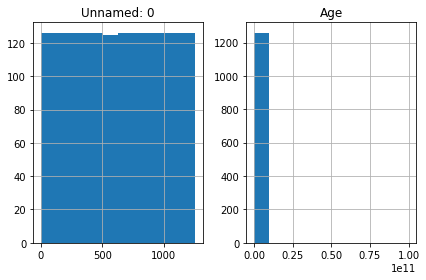

In [8]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
wrangle.summarize(df)

------

In [9]:
# checking to see if there are any duplicate rows
test_df = df.duplicated()
test_df.value_counts()

False    1259
dtype: int64

# Acquire Key Findings, Takeaways, and Next Steps:
- Good amount of nulls to drop or fill in 
- Choose to change some of the object datatype to numeric datatype, decide what to drop, or decide what to use in modeling
- columns to encode to numeric datatype: gender, Country, self_employed, family history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys-health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence
- drop unnecessary columns: state and comments
- Since there are not unique identifiers for each observation, we cannot definitively say that each observation is a different person
- We can, however, say that there are no duplicate entries in this data set

------

## Data Preparation

In [10]:
# initial prep for object data
strings_df = wrangle.prep_the_strings(df)
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   unnamed: 0                 957 non-null    int64         
 1   timestamp                  957 non-null    datetime64[ns]
 2   age                        957 non-null    int64         
 3   gender                     957 non-null    object        
 4   country                    957 non-null    object        
 5   self_employed              957 non-null    object        
 6   family_history             957 non-null    object        
 7   treatment                  957 non-null    object        
 8   work_interfere             957 non-null    object        
 9   no_employees               957 non-null    object        
 10  remote_work                957 non-null    object        
 11  tech_company               957 non-null    object        
 12  benefit

In [11]:
# initial prep for encoding objects into integers
encoded_df = wrangle.prep_encode(strings_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   unnamed: 0                 957 non-null    int64         
 1   timestamp                  957 non-null    datetime64[ns]
 2   age                        957 non-null    int64         
 3   gender                     957 non-null    int64         
 4   country                    957 non-null    object        
 5   self_employed              957 non-null    int64         
 6   family_history             957 non-null    int64         
 7   treatment                  957 non-null    int64         
 8   work_interfere             957 non-null    int64         
 9   company_size               957 non-null    int64         
 10  remote_work                957 non-null    int64         
 11  tech_company               957 non-null    int64         
 12  benefit

**To prep this data before exploration, the following was done:**

|   Feature      | Description    | Encoding |
| :------------- | ----------- | -----------: |
| timestamp	|  Time survey was submitted | - |
| age	| Respondent age  | - |
| gender	| Respondent gender | male:0, female:1, other:2 |
| country	 |  Respondent survey  | Only kept N America and Europe |
| self_employed	 | Whether or not they were self employed | No:0, Yes:1 |
| family_history	| Whether or not they have a family history of mental illness | No:0, Yes:1 |
| treatment	 |  Whether or not they have sought treatment  | No:0, Yes:1 |
|  work_interfere	  |  If the person felt that the mental condition interfered with work | Never:0, Rarely:1, Sometimes:2, Often:3, NA:4 |
| no_employees	| The number of employees in the company or organization  | <5:0, 6-25:1, 26-100:2, 101-500:3, 501-1000:4, >1000:5 |
| remote_work	 | Having remote work (outside of an office) at least 50% of the time | No:0, Yes:1 |
| tech_company	| The employer is primarily a tech company/organization | No:0, Yes:1 |
| benefits  |	Providing mental health benefits by the employer | No:0, Yes:1, Don't know:2 |
| care_options |	Providing options for mental health care by the employer | No:0, Yes:1, Not sure:2 |
| wellness_program	| Discussion about mental health as part of an employee wellness program by the employees | No:0, Yes:1, Don't know:2 |
| seek_help	| Provided resources by the employer to learn more about mental health issues and how to seek help | No:0, Yes:1, Don't know:2 |
| anonymity |	Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources | No:0, Yes:1, Don't know:2 |
| leave  |	How easy is it for you to take medical leave for a mental health condition? | Very difficult:0, Somewhat difficult:1, Don't know:2, Somewhat easy:3, Very easy:4 |
| mental-health_consequence |	Having negative consequences caused by discussing a mental health issue with your employer | No:0, Yes:1, Maybe:2 |
| phys-health_consequence	 | Having negative consequences caused by discussing a physical health issue with your employer  | No:0, Yes:1, Maybe:2 |
| coworkers |	Would you be willing to discuss a mental health issue with your coworkers? | No:0, Yes:1, Some of them:2 |
| supervisor	| Would you be willing to discuss a mental health issue with your direct supervisor(s)? | No:0, Yes:1, Some of them:2 |
| mental_health_interview  |	Would you bring up a mental health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| phys_health_interview |	Would you bring up a physical health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| mental_vs_physical |	Do you feel that your employer takes mental health as seriously as physical health? | No:0, Yes:1, Don't know:2 |
|  obs_consequence  |  Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  | No:0, Yes:1 |

------

### Data Preparation Key Findings, Takeaways, and Next Steps:

- Chose to only include North America and Europe in our dataset: The economic status in these two countries are similar and this will give us more controlled variables with less bias in the data.
- The cleaning process had a moderate amount of nulls that needed to filled in or dropped 
- Deciding on what to fill nulls for each column was dependent on the column we were dealing with as you can see in the cell above.
- Initially decided to not one hot encode: will decide which columns to one hot encode once we find what features are drivers and what features are not.

------

## Data Exploration
### 1st Iteration
The first iteration will be performed on encoded data, before deciding which variables to one-hot encode before the second iteration of data exploration.

### Univariate

In [12]:
# first let's split the data...

# encoded data
encoded_train, encoded_validate, encoded_test = explore.three_split(encoded_df, 'work_interfere')

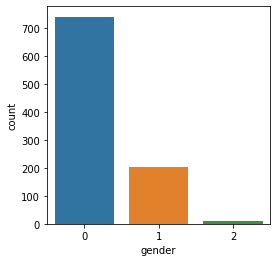

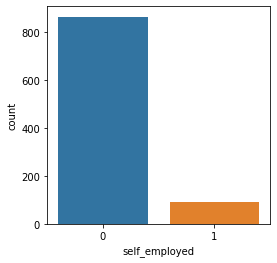

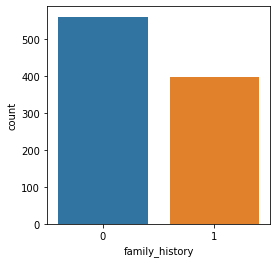

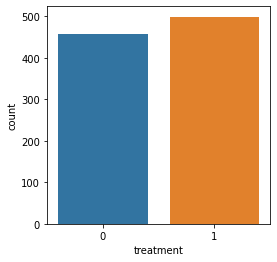

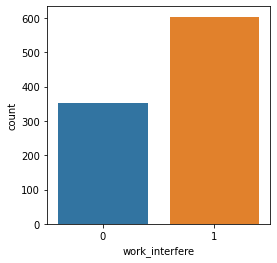

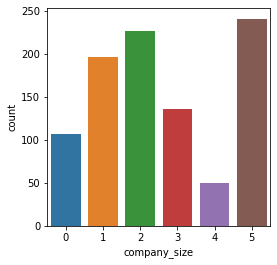

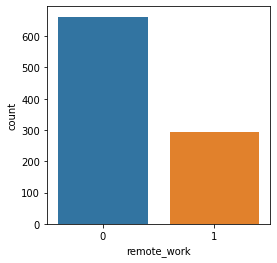

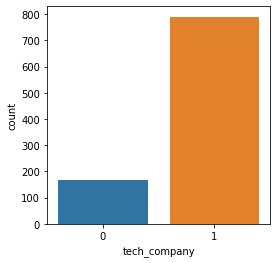

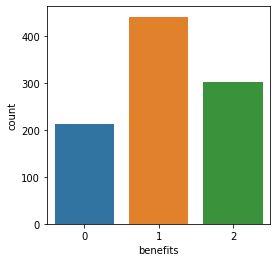

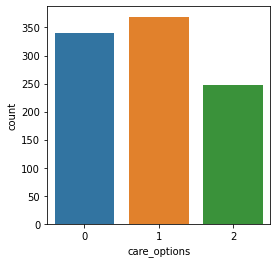

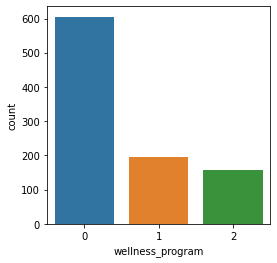

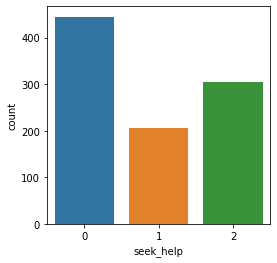

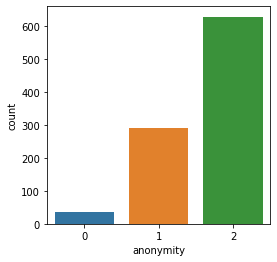

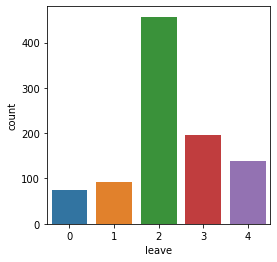

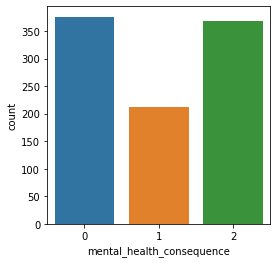

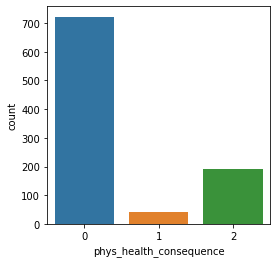

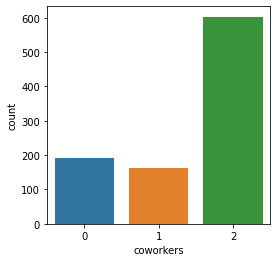

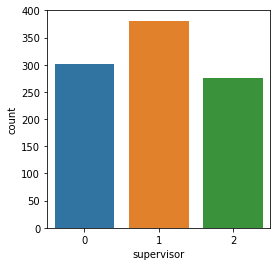

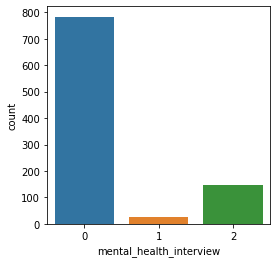

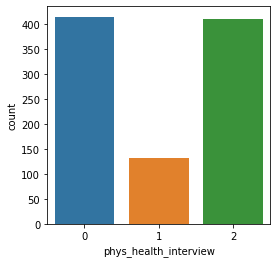

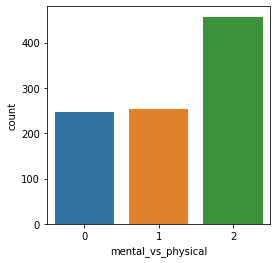

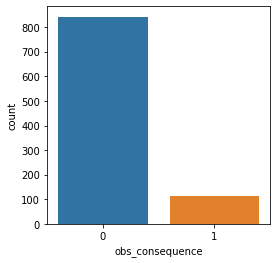

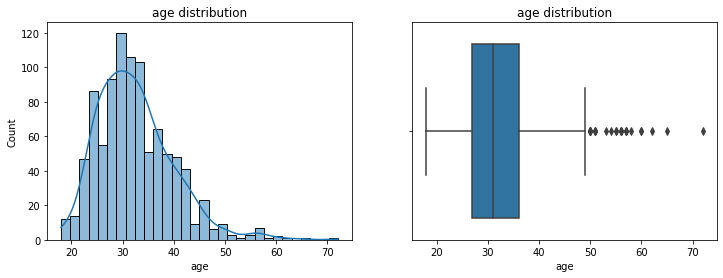

In [13]:
# countplots of categorical variables
# histograms and bosplots of continuous variables
explore.mental_health_univariate(encoded_df)

#### Univariate 1st Iteration - Key Findings, Takeaways, and Next Steps:
- `gender` is heavily imbalanced, with 70% of respondents being male. What kind of impact will this have? Are men more/less likey to seek treatment and/or have mental health issues that lead to workplace interference?
- `self-employed` is also heavily imbalanced, with only 10% reporting being self-employed. Does this group have more/less issues than those working for others?
- `family_history` is 60% no history, 40% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split. Will be very interested to see if this is a driver - Does receiving treatement lead to more or less interference?
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-fifth not receiving any, and one-third unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` has 60% not having a wellness program, and 20% each either having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` has 40% not receiving help/resources from their company, and 30% receiving help, and 20% unsure.
- `anonymity` shows an overwhelming majority of respondents who are unsure if they would be able to remain anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` shows most either do not think their would be consequences, or are unsure
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 5% worry about consequences, and 20% are unsure. We are really interested to see what leads to these differences.
- `coworkers` shows an overwhelming majority are unsure if they would be comfortable speaking with coworkers about personal mental health issues.
- `supervisor` shows another stark contrast where most do feel comfortable speaking with a supervisor about mental health issues, even though they are unsure about speaking with coworkers.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` shows an equal amount of yes and no responses, with a larger portion of unsure. These groups definitely need to be looked into.
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

### Bivariate

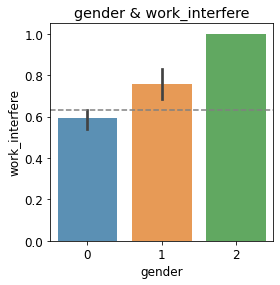


_____________________



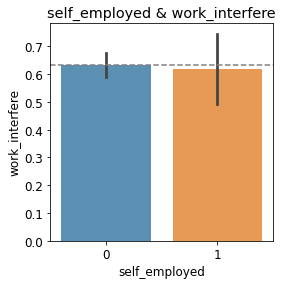


_____________________



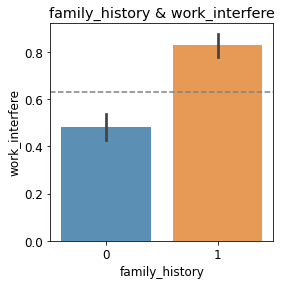


_____________________



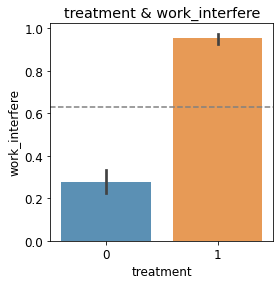


_____________________



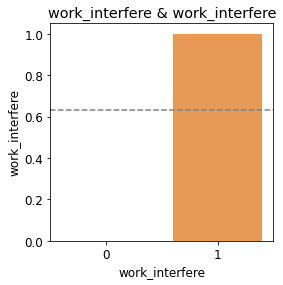


_____________________



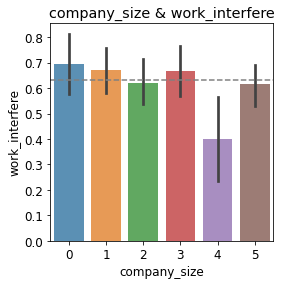


_____________________



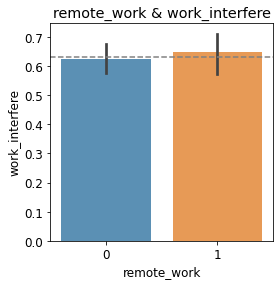


_____________________



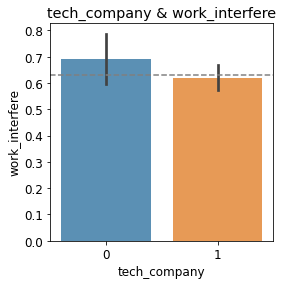


_____________________



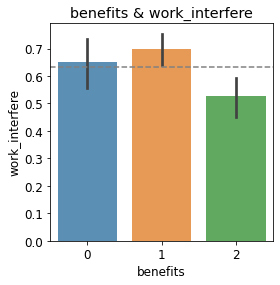


_____________________



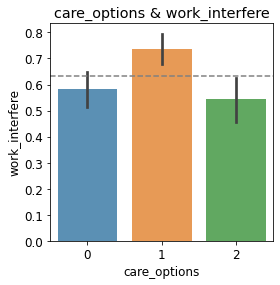


_____________________



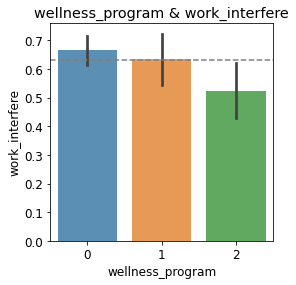


_____________________



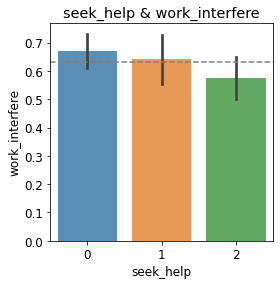


_____________________



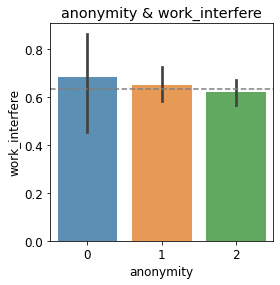


_____________________



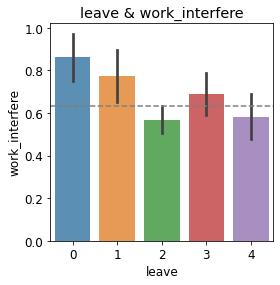


_____________________



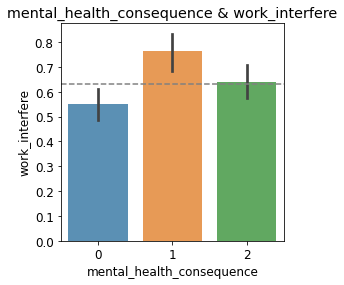


_____________________



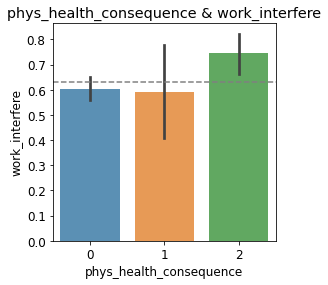


_____________________



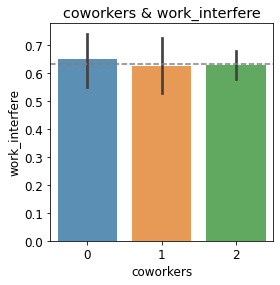


_____________________



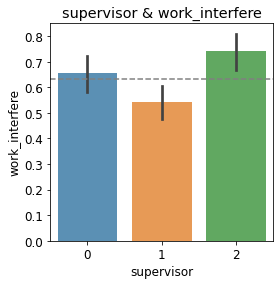


_____________________



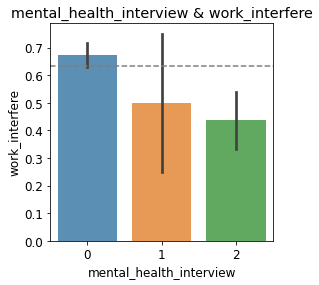


_____________________



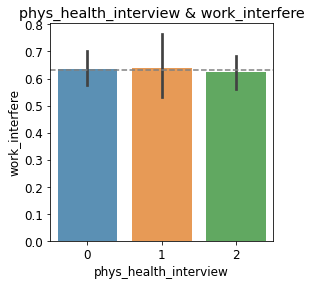


_____________________



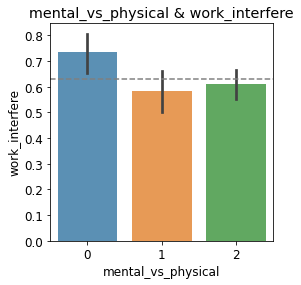


_____________________



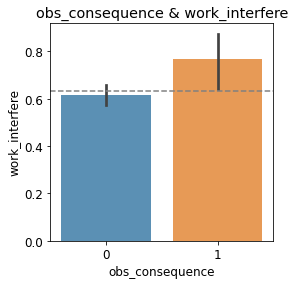


_____________________

age


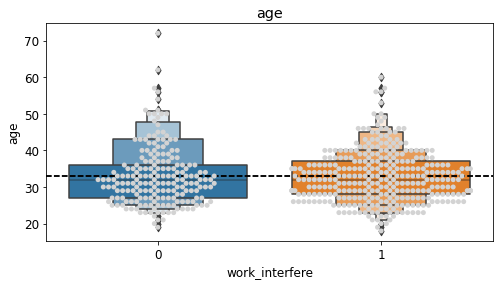

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2              work_interfere  530.71   0.0000                 1.0
3     mental_health_interview   18.51   0.0001                 2.0
4                care_options   16.16   0.0003                 2.0
5                  supervisor   15.60   0.0004                 2.0
6   mental_health_consequence   15.41   0.0005                 2.0
7                       leave   19.49   0.0006               

In [14]:
encoded_bi_metrics = explore.mental_health_bivariate(encoded_train, 'work_interfere')

#### Bivariate 1st Iteration - Key Findings, Takeaways, and Next Steps:

**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- gender, family history, treatment, benefits, care options, wellness program, leave, mental health consequence, phys health consequence, supervisor, mental health interview, mental vs physical, obs consequence
- These variables all show 

**Other Observations**
- Some of the values have a "don't know" column and they all are much less than yes or no. My theory is this is because people who need to access help or resources to get help probably looked into it because it was impacting work performance. 
        - companies larger than 1000 employees seem to have the least amount of impacts to work compared to the other sized companies
        - people who feel like their employer does not consider mental health to be similar to physical health report higher rates of impact to work. 
        - Feeling comfortable talking to a supervisor also reduces the impact to work performance
        - perceiving that one would be punished for mental health also had a higher rate of impact to work performance
        - observing negative consequences to others in the company hurts work performance
        - the easier it is to get leave the less impact to work performance there is

**Worth Exploring Further**
- company size

### 2nd Iteration
The second iteration will be performed on the one-hot encoded data, before deciding what other feature engineering we would like to perform before the third iteration of data exploration.

In [15]:
# one-hot encode the data
hot_df = explore.one_hot(encoded_df)

In [16]:
# split the one-hot encoded data
hot_train, hot_validate, hot_test = explore.three_split(hot_df, 'work_interfere')

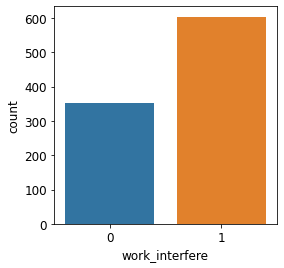

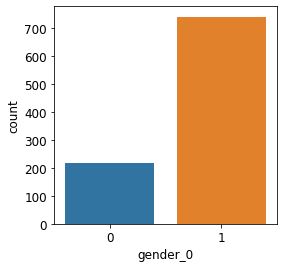

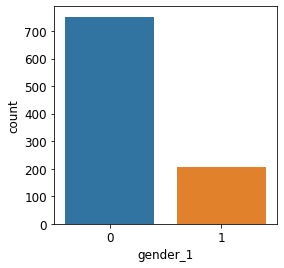

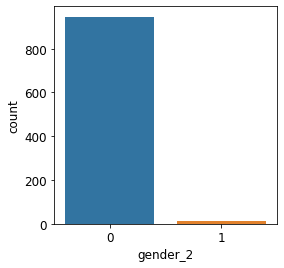

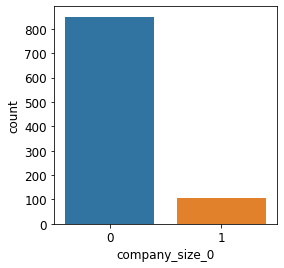

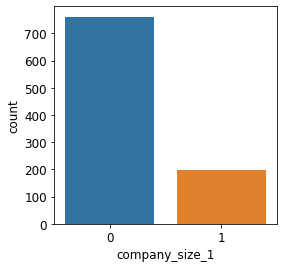

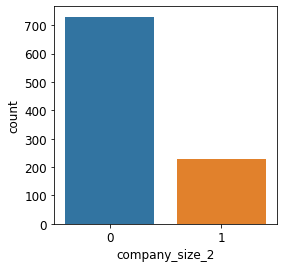

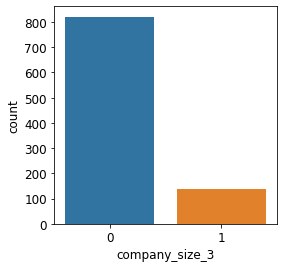

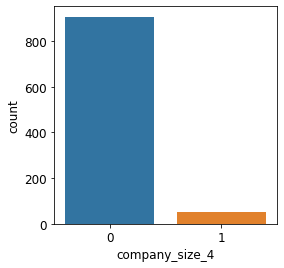

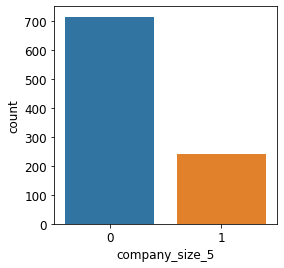

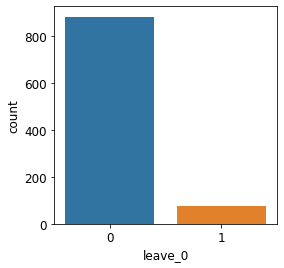

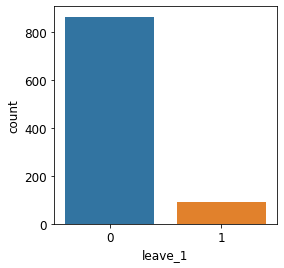

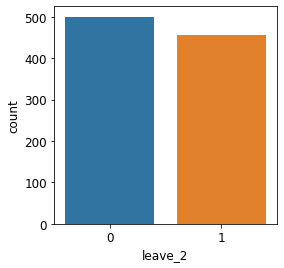

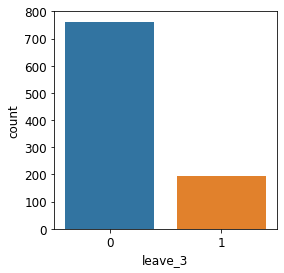

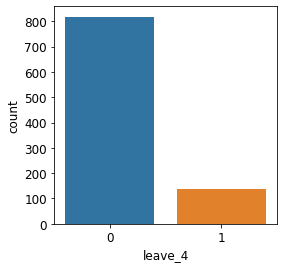

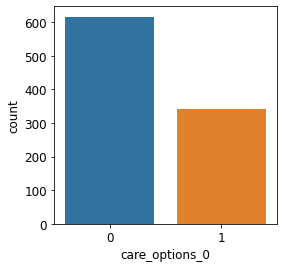

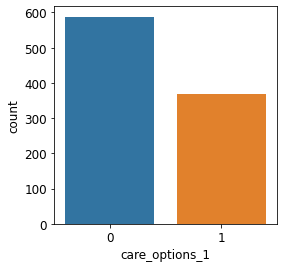

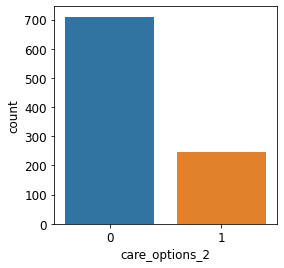

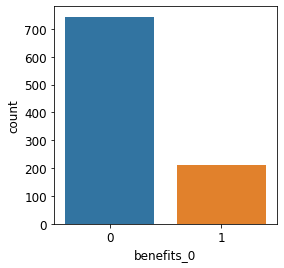

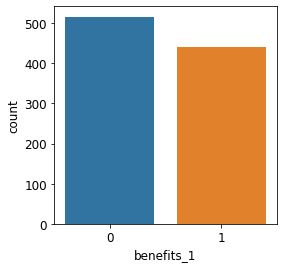

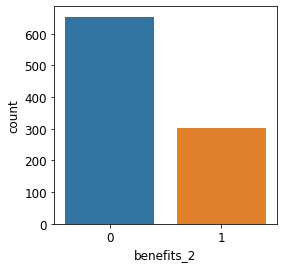

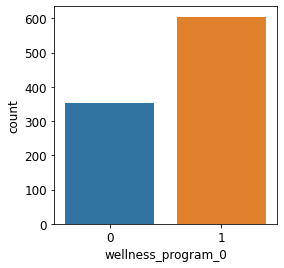

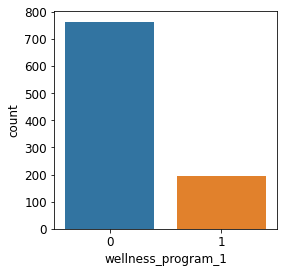

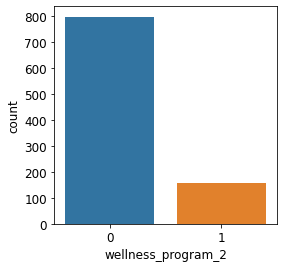

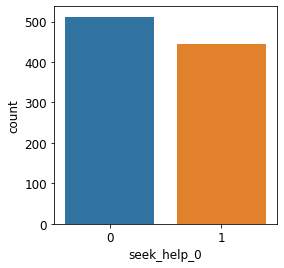

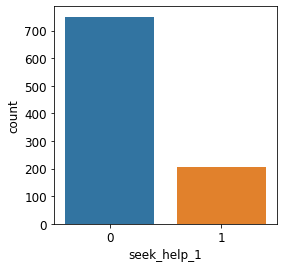

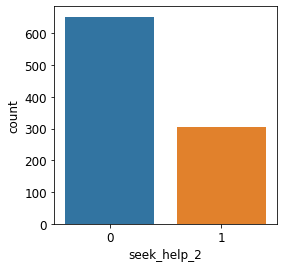

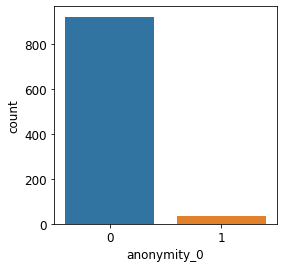

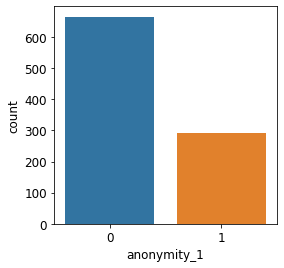

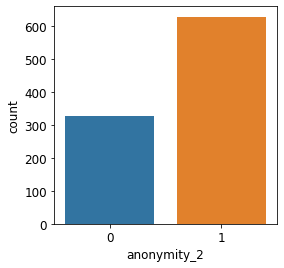

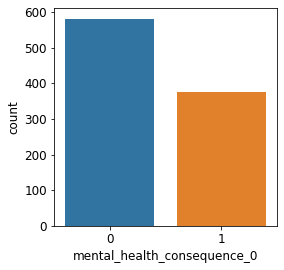

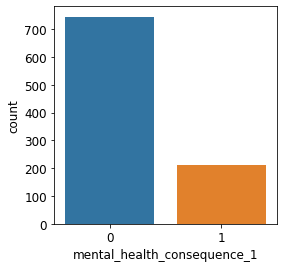

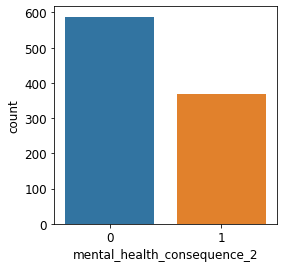

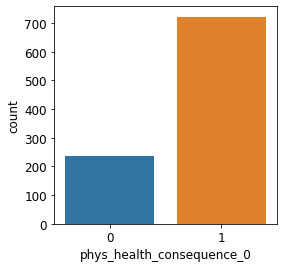

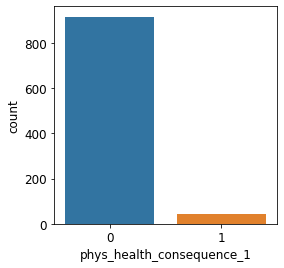

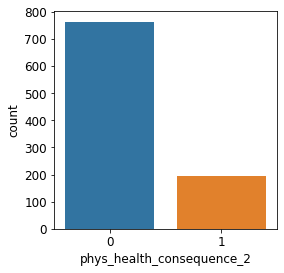

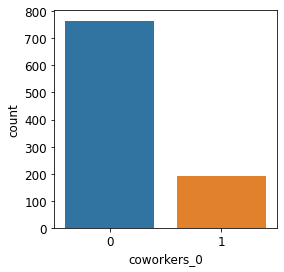

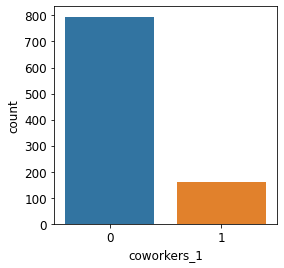

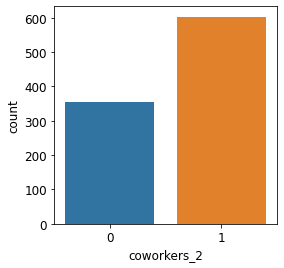

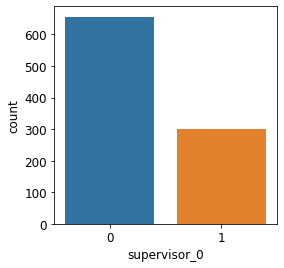

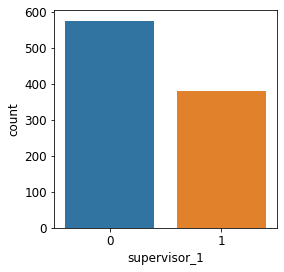

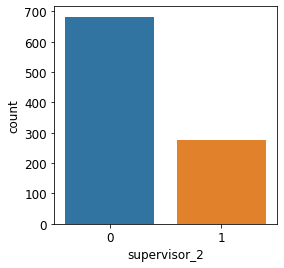

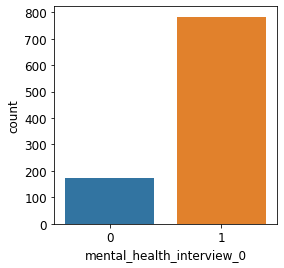

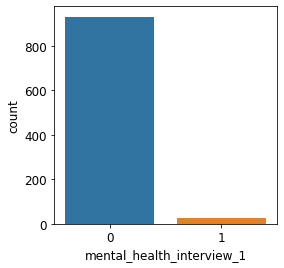

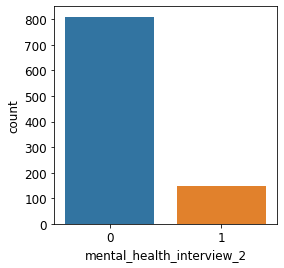

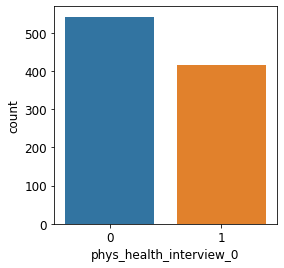

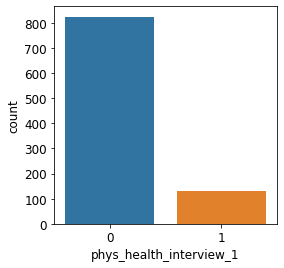

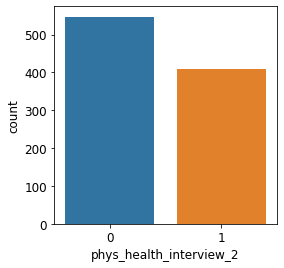

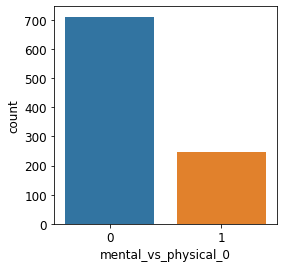

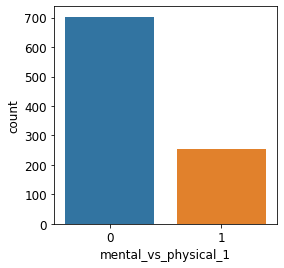

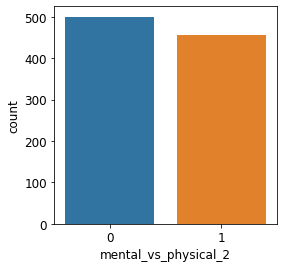

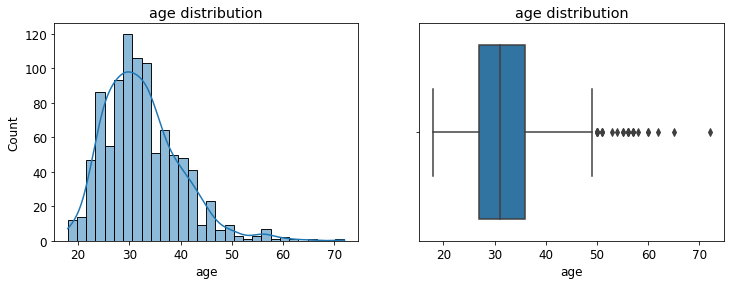

In [17]:
# univariate exploration on one-hot encoded data

explore.mental_health_univariate(hot_df)

#### Univariate 2nd Iteration - Key Findings, Takeaways, and Next Steps:
**Observations**
- age has outliers: Will need to decide if we keep age and drop outliers, keep age and do not drop outliers, or decide not use age column.
- Respondents who do not know how easy is it for them to take medical leave for a mental health condition account for at least half the respondents in the leave column.
- Respondents who are not provided resources by the employer to learn more about mental health issues and how to seek help account for at least half the respondents in the seek_help column.
- Respondents who can talk to some of their co-workers account for at least half of the respondents in the co_workers column.
- Respondents who are unsure about they feel their employer takes mental health vs physical health account for at least half the respondents in the mental_vs_physical column.

### Bivariate

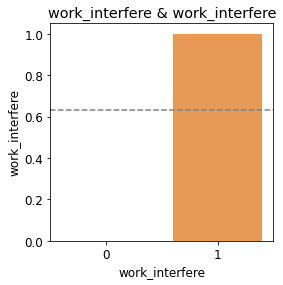


_____________________



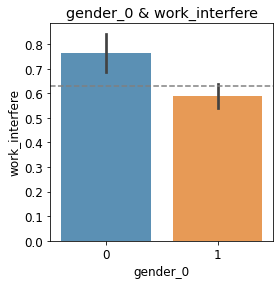


_____________________



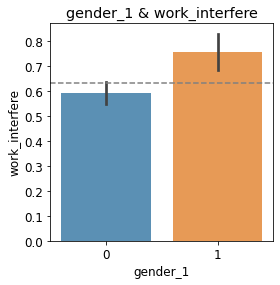


_____________________



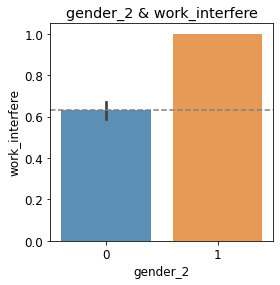


_____________________



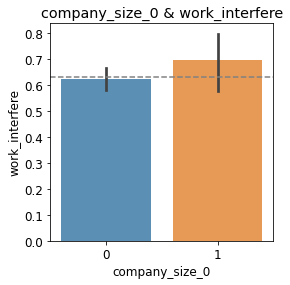


_____________________



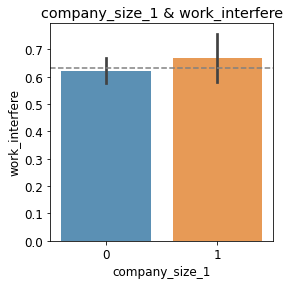


_____________________



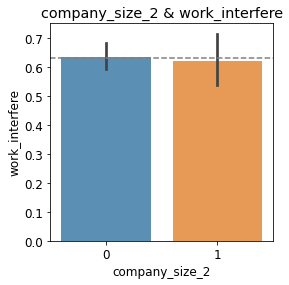


_____________________



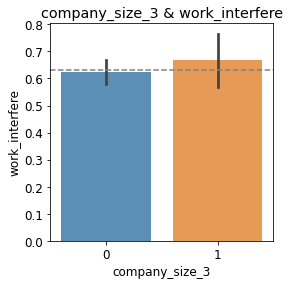


_____________________



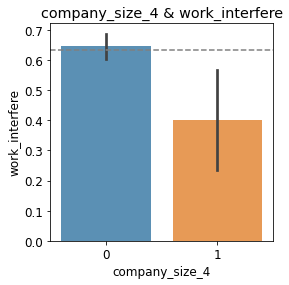


_____________________



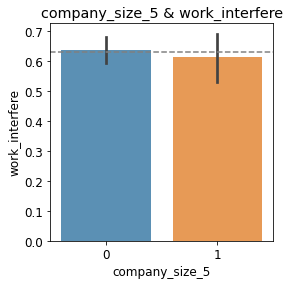


_____________________



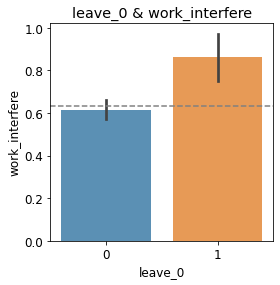


_____________________



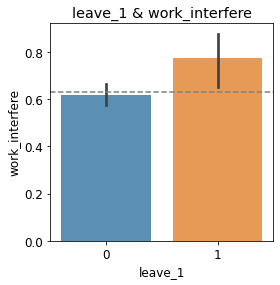


_____________________



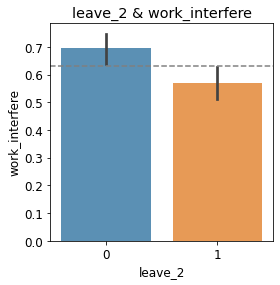


_____________________



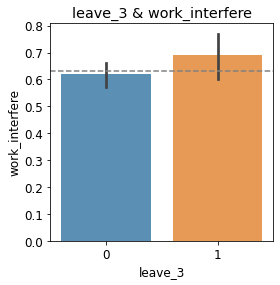


_____________________



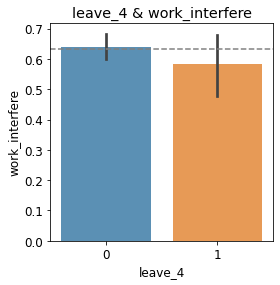


_____________________



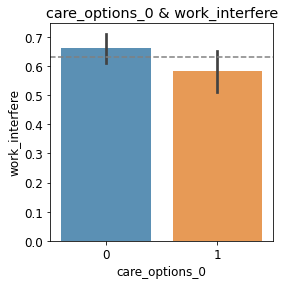


_____________________



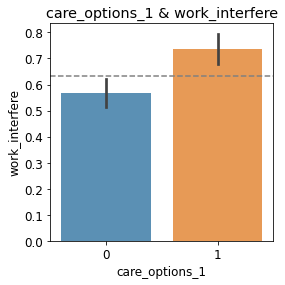


_____________________



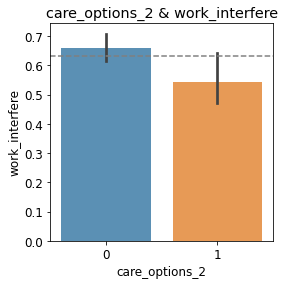


_____________________



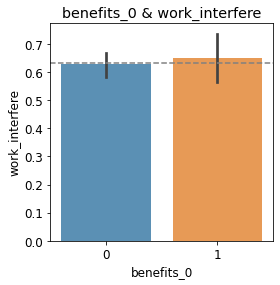


_____________________



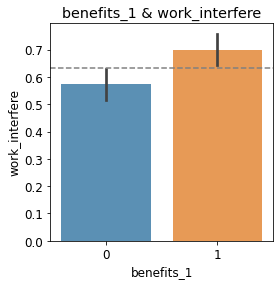


_____________________



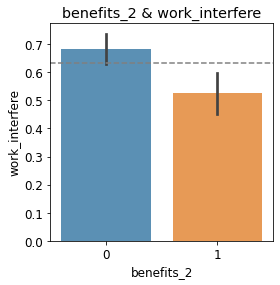


_____________________



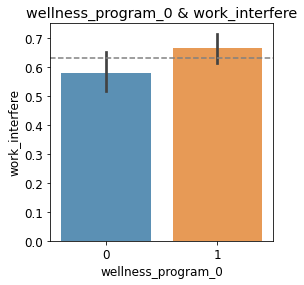


_____________________



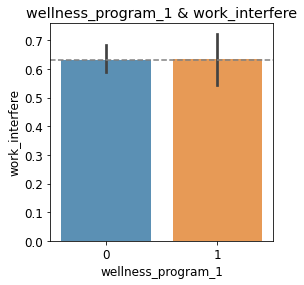


_____________________



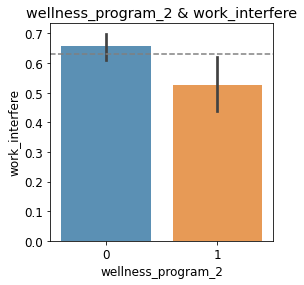


_____________________



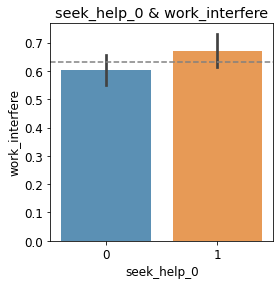


_____________________



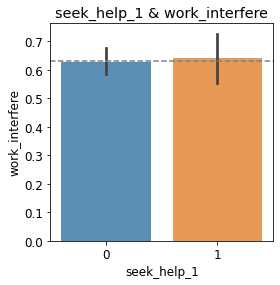


_____________________



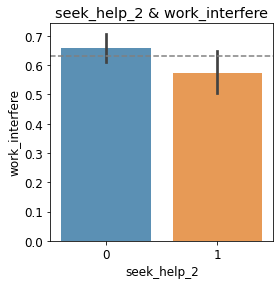


_____________________



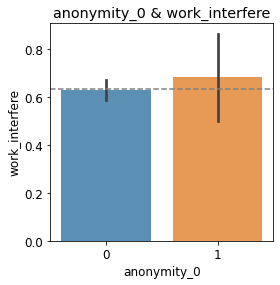


_____________________



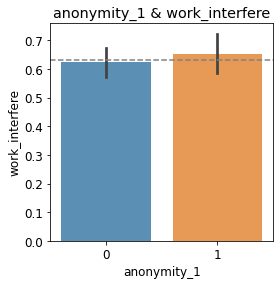


_____________________



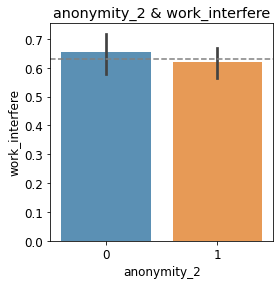


_____________________



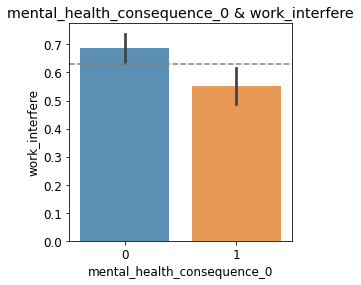


_____________________



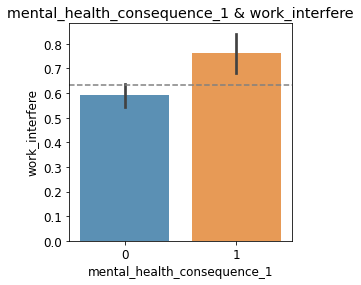


_____________________



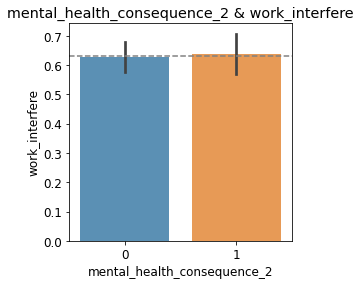


_____________________



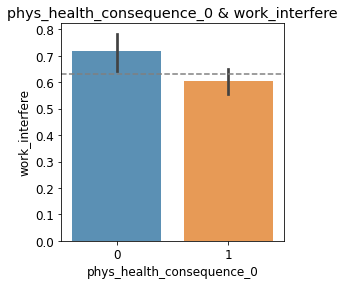


_____________________



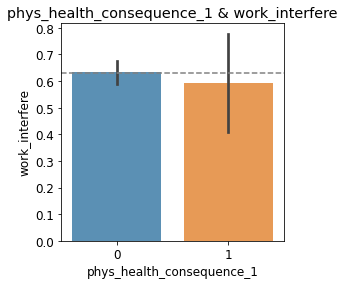


_____________________



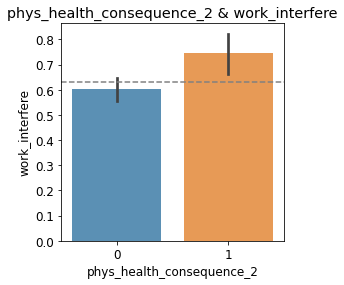


_____________________



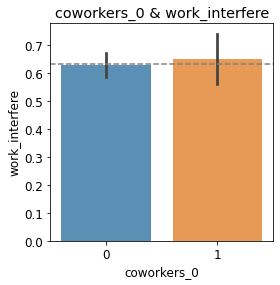


_____________________



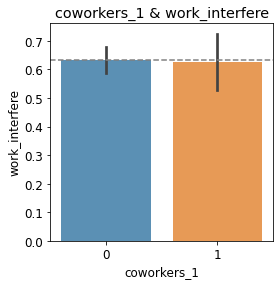


_____________________



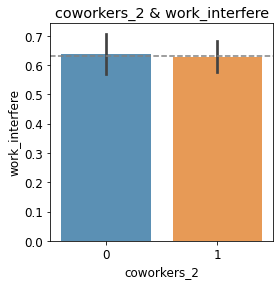


_____________________



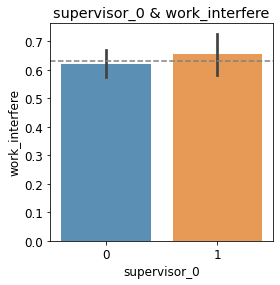


_____________________



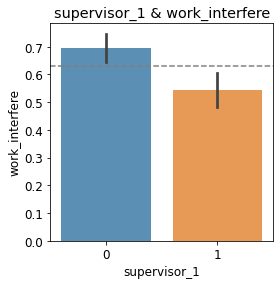


_____________________



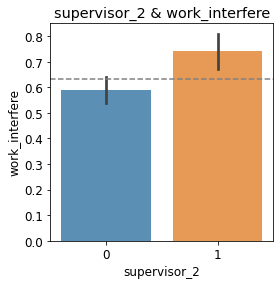


_____________________



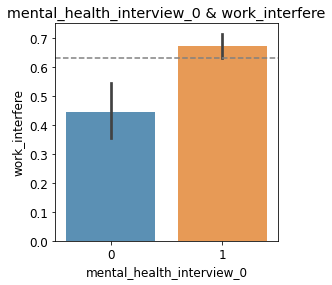


_____________________



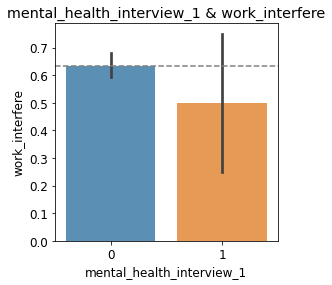


_____________________



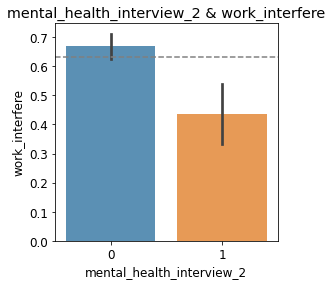


_____________________



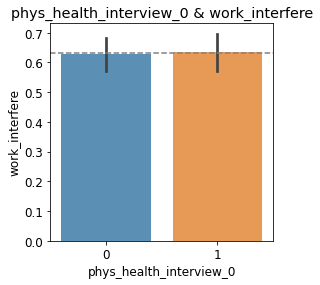


_____________________



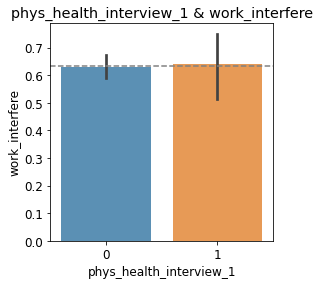


_____________________



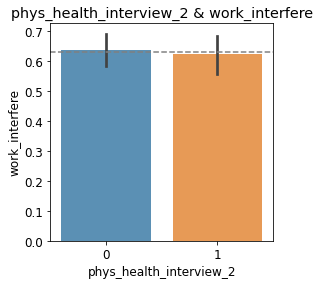


_____________________



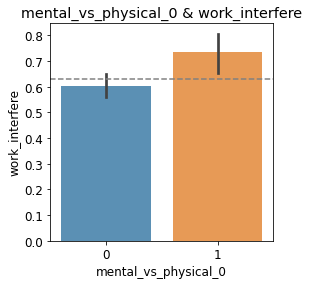


_____________________



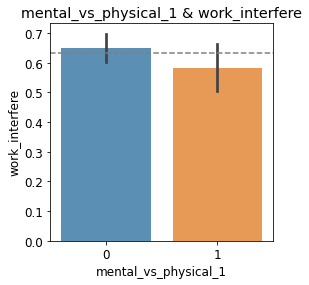


_____________________



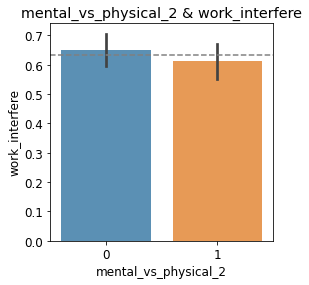


_____________________

age


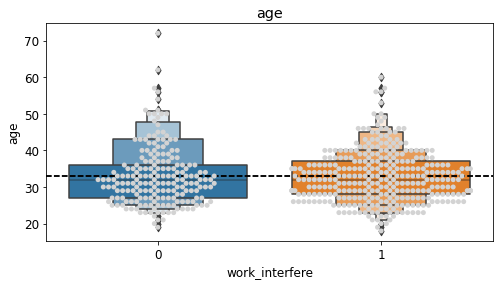

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  530.71   0.0000                 1.0
1     mental_health_interview_0   17.35   0.0000                 1.0
2     mental_health_interview_2   15.99   0.0001                 1.0
3                care_options_1   14.97   0.0001                 1.0
4                  supervisor_1   12.42   0.0004                 1.0
5                    benefits_2   12.19   0.0005                 1.0
6                      gender_0   11.74   0.0006                 1.0
7   mental_health_consequence_1   11.28   0.0

In [18]:
hot_bi_metrics = explore.mental_health_bivariate(hot_train, 'work_interfere')

#### Bivariate 2nd Iteration - Key Findings, Takeaways, and Next Steps:

**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- Top 5: 
    - Respondents who would either maybe or not bring up mental health issues with an employed in an interview.
    - Respondents who know about their care options for mental health care
    - Respondents who are feel comfortable speaking to their supervisor
    - Respondents who are provided with mental health
    - Respondents who think that discussing a mental health issue with your employer would have negative consequences.

### Hypothesis Testing and Multivariate Visualization
#### Target Variable: 'work_interfere'

#### Hypothesis 1: 'Supervisor'
- alpha : 0.05
- ${H_0}$: The mean workplace interference is the same for those who feel comfortable speaking with their supervisor about mental health issues, and those who do not feel comfortable.
- ${H_a}$: The mean workplace interference is different for those who feel comfortable speaking with their supervisor about mental health issues than those who do not feel comfortable communicating those issues with their supervisor.

In [19]:
# Here is the work for hypothesis 1
explore.ty_chi(encoded_train, 'work_interfere', 'supervisor')

work_interfere & supervisor chi2 test results

chi^2 = 15.60
    p = 0.0004


#### Hypothesis 1 - Key Findings, Takeaways, and Next Steps:
- 'Supervisor'
- Since the p-value is less than alpha, we can reject the null hypothesis. There is evidence to suggest a relationship between an employee feeling comfortable speaking with a supervisor about personal mental health issues and work interference.

#### Hypothesis 2: Does having benefits affect whether or not you seek treatment affect work interference?
- alpha : 0.05
- ${H_0}$: There is no difference between having benefits and whether or not treatment is sought.
- ${H_a}$: There is a difference between having benefits and whether or not treatment is sought.

Controlling for benefits = 0

work_interfere & treatment chi2 test results

chi^2 = 37.38
    p = 0.0000

------------------------------------
Controlling for benefits = 1

work_interfere & treatment chi2 test results

chi^2 = 139.08
    p = 0.0000

------------------------------------
Controlling for benefits = 2

work_interfere & treatment chi2 test results

chi^2 = 76.00
    p = 0.0000

------------------------------------


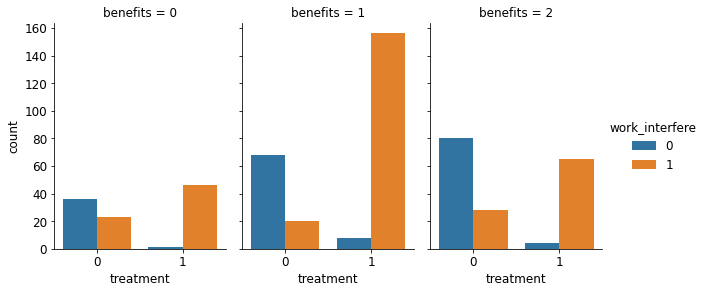

In [20]:
explore.plot_chi(encoded_train, 'benefits', 'work_interfere', 'treatment' )

#### Hypothesis 2 - Key Findings, Takeaways, and Next Steps:
- Due to our p-value being less than alpha, we reject the null hypothesis.
- There is evidence to suggest a relationship between individuals who have sought treatment in the past and whether or not they have benefits affects work interference.

#### Hypothesis 3: If you have observed negative consequences for coworkers with mental health conditions do you not talk to your supervisor and this interferes with your work performance?
- alpha : 0.05
- ${H_0}$: There is no difference between observed negative consequences for coworkers with mental health conditions and talking to my supervisor.
- ${H_a}$: There is a difference between observed negative consequences for coworkers with mental health conditions and talking to my supervisor.

Controlling for supervisor = 0

work_interfere & obs_consequence chi2 test results

chi^2 = 0.30
    p = 0.5854

------------------------------------
Controlling for supervisor = 1

work_interfere & obs_consequence chi2 test results

chi^2 = 0.07
    p = 0.7980

------------------------------------
Controlling for supervisor = 2

work_interfere & obs_consequence chi2 test results

chi^2 = 1.90
    p = 0.1681

------------------------------------


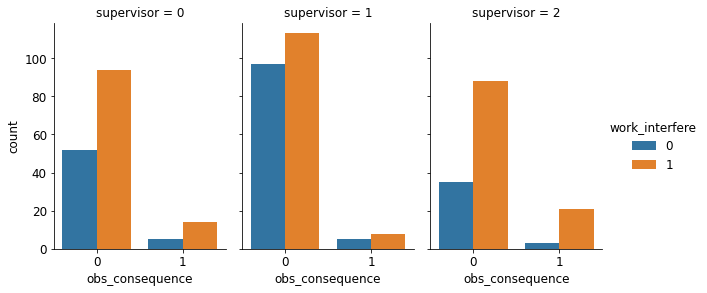

In [21]:
explore.plot_chi(encoded_train, 'supervisor', 'work_interfere', 'obs_consequence')

#### Hypothesis 3 - Key Findings, Takeaways, and Next Steps:
- Due to our p-value being less than alpha, we reject the null hypothesis, except for supervisor option 0 (No can't speak to supervisor) and option 1 (yes they can speak to their supervisor).
- If a employee who either does not feel comfortable speaking to their supervisor or feels comfortable with speaking to some of their supervisors, and has not observed any negative consequences they have higher than a 50% increase in work interference.

#### Hypothesis 4: If you believe speaking about mental health has negative consequences have/have not sought treatment to the point where it interferes with work?
- alpha : 0.05
- ${H_0}$: If you believe speaking about mental health has negative consequences and have/have not sought it has no affect with work interference?
- ${H_a}$: If you believe speaking about mental health has negative consequences and have/have not sought it has an affect with work interference?

Controlling for mental_health_consequence = 0

work_interfere & obs_consequence chi2 test results

chi^2 = 2.99
    p = 0.0840

------------------------------------
Controlling for mental_health_consequence = 1

work_interfere & obs_consequence chi2 test results

chi^2 = 0.76
    p = 0.3823

------------------------------------
Controlling for mental_health_consequence = 2

work_interfere & obs_consequence chi2 test results

chi^2 = 0.00
    p = 0.9989

------------------------------------


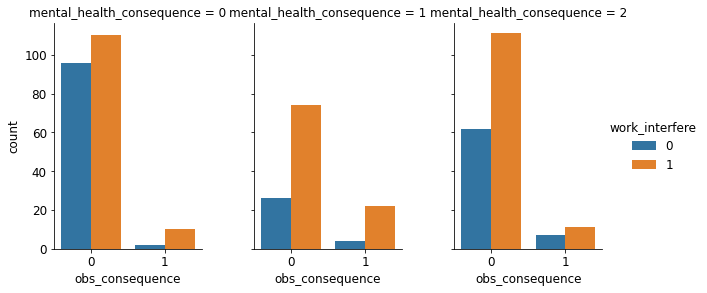

In [22]:
explore.plot_chi(encoded_train, 'mental_health_consequence', 'work_interfere', 'obs_consequence')

#### Hypothesis 4 - Key Findings, Takeaways, and Next Steps:
- Due to our p-value being less than alpha, we reject the null hypothesis except for mental health consequence option 2 (unsure).
- If a employee who either believe they will have negative consequences or unsure if there will be negative consequences speaking about mental health to their employed, and has not observed any negative consequences they have higher than a 50% increase in work interference.

#### Hypothesis 5: 'Supervisor'
- alpha : 0.05
- ${H_0}$: The mean workplace interference is the same for those who feel comfortable speaking with their supervisor about mental health issues, and those who do not feel comfortable.
- ${H_a}$: The mean workplace interference is different for those who feel comfortable speaking with their supervisor about mental health issues than those who do not feel comfortable communicating those issues with their supervisor.

In [23]:
# Here is the work for hypothesis 1

observed = pd.crosstab(encoded_train.supervisor, encoded_train.work_interfere)

In [24]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 57 108]
 [102 121]
 [ 38 109]]
---
Expected

[[ 60.75700935 104.24299065]
 [ 82.11401869 140.88598131]
 [ 54.12897196  92.87102804]]
---

chi^2 = 15.5976
p     = 0.0004


#### Hypothesis 5 - Key Findings, Takeaways, and Next Steps:
- Due to our p-value being less than alpha, we reject the null hypothesis.
- There is evidence to suggest a relationship between feeling comfortable speaking with a supervisor about personal mental health issues and our target variable, 'work_interfere'

#### Hypothesis 6: controlling for `gender`, how does `talking to a supervisor` relate to `work_interfere`
- alpha : 0.05
- ${H_0}$: When controlling for gender, the rate of work interference is the same among all responses to mental_vs_physical
- ${H_a}$: When controlling for gender, the rate of work interference is different among each response to mental_vs_physical

In [26]:
explore.three_chi(encoded_train, 'gender', 'work_interfere', 'supervisor')

controlling for gender = 0

work_interfere & supervisor chi2 test results

chi^2 = 13.69
    p = 0.0011

-----------------------------------
controlling for gender = 1

work_interfere & supervisor chi2 test results

chi^2 = 1.38
    p = 0.5009

-----------------------------------
controlling for gender = 2

work_interfere & supervisor chi2 test results

chi^2 = 0.00
    p = 1.0000

-----------------------------------


#### Hypothesis 6: Takeaways from `supervisor` and `work_interfere` when controlling for `gender`
- Men who feel comfortable speaking about mental health issues with a supervisor have work place interference at a significantly lower rate than those who either feel uncomfortable, or do not know.
- For women, it surprisingly does not seem to matter how they responded to the 'supervisor' question
- There is not enough data for gender=other to have actionable insight
- We recommend that companies work to improve communication between management and staff, as there is clear evidence that it greatly helps reduce the rate of workplace interference amongst men, and does not harm anyone else.

#### Hypothesis 7: controlling for `gender`, how does `mental_vs_physical` relate to `work_interfere`
- alpha : 0.05
- ${H_0}$: When controlling for gender, the rate of work interference is the same among all responses to mental_vs_physical
- ${H_a}$: When controlling for gender, the rate of work interference is different among each response to mental_vs_physical

Controlling for gender = 0

work_interfere & mental_vs_physical chi2 test results

chi^2 = 5.53
    p = 0.0629

------------------------------------
Controlling for gender = 1

work_interfere & mental_vs_physical chi2 test results

chi^2 = 8.01
    p = 0.0183

------------------------------------
Controlling for gender = 2

work_interfere & mental_vs_physical chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


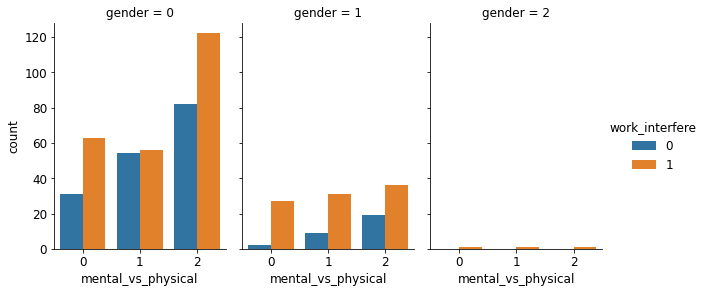

In [28]:
explore.plot_chi(encoded_train, 'gender', 'work_interfere', 'mental_vs_physical')

#### Hypothesis 7 - Key Findings, Takeaways, and Next Steps:
- Men who feel that their company takes mental health as seriously as physical health have work interference at a significantly lower rate than those who do not, or do not know.
- Women who feel that their company takes mental health as seriously as physical health have work interference at a lower rate than those who do not, or do not know.
- Once again, we do not have enough data where gender = other to have actionable insight.

#### Hypothesis 8: controlling for `gender`, how does `anonymity` relate to `work_interfere`
- alpha : 0.05
- ${H_0}$: When controlling for gender, the rate of work interference is the same among all responses to anonymity
- ${H_a}$: When controlling for gender, the rate of work interference is different among each response to anonymity

Controlling for gender = 0

work_interfere & anonymity chi2 test results

chi^2 = 0.51
    p = 0.7764

------------------------------------
Controlling for gender = 1

work_interfere & anonymity chi2 test results

chi^2 = 0.35
    p = 0.8389

------------------------------------
Controlling for gender = 2

work_interfere & anonymity chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


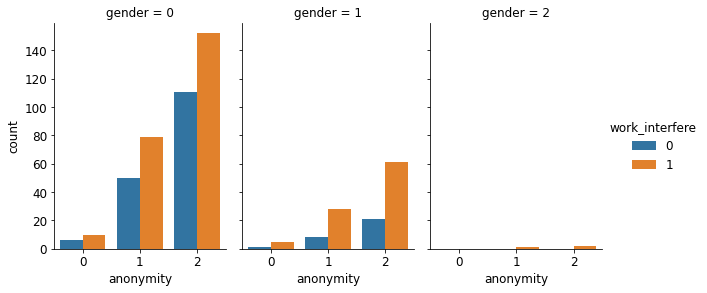

In [30]:
explore.plot_chi(encoded_train, 'gender', 'work_interfere', 'anonymity')

#### Hypothesis 8 - Key Findings, Takeaways, and Next Steps:


#### Hypothesis 9: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]


------

### Explore Key Findings, Takeaways, and Next Steps:

------

## Modeling

### Initital Setup

In [ ]:
# calculate baseline model using mean
encoded_df['baseline'] = 1
baseline_accuracy = (encoded_df.baseline == encoded_df.work_interfere).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

In [ ]:
# encode the top 9 variables as decided by p value with chi2 with degrees of freedom >1
dum_df = pd.get_dummies(data = encoded_df, columns = ['mental_health_interview','care_options','supervisor',
                                'mental_health_consequence','leave', 'benefits','gender'], drop_first = True)

In [ ]:
# drop the unecessary columns
dum_df = dum_df.drop(columns = ['age', 'self_employed', 'company_size', 'remote_work', 
                               'tech_company', 'wellness_program','seek_help', 
                               'anonymity', 'phys_health_consequence', 'coworkers',
                               'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 
                               'baseline', 'timestamp', 'country'])

In [ ]:
from imblearn import over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import explore, evaluate
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [ ]:
# set up the random over sampler for class imbalance
ros = over_sampling.RandomOverSampler(random_state = 123)

In [ ]:
# do the splits
X_train, y_train, X_validate, y_validate, X_test, y_test = explore.full_split(dum_df, 'work_interfere')

In [ ]:
# create resampled data for training set
X_res, y_res = ros.fit_resample(X_train, y_train)

In [ ]:
X_res.columns

### Model 1: Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3).fit(X_res,y_res)

In [ ]:
evaluate.run_metrics(X_res, y_res, tree, 'Train')

In [ ]:
evaluate.run_metrics(X_validate, y_validate, tree, 'Validation')

#### Model 1: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 2: Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       random_state=123).fit(X_res, y_res)

In [ ]:
evaluate.run_metrics(X_res, y_res, rfc, 'Train')

In [ ]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'Validate')

#### Model 2: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 3: [insert model name here]

In [ ]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.25, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None).fit(X_res, y_res)

In [ ]:
evaluate.run_metrics(X_res, y_res, xgbc, 'Train')

In [ ]:
evaluate.run_metrics(X_validate, y_validate, xgbc, 'Validate')

#### Model 3: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 4: Multi-layer Perceptron Classifier

In [ ]:
mlp = MLPClassifier(random_state=123, max_iter=300).fit(X_res, y_res)

In [ ]:
evaluate.run_metrics(X_res, y_res, mlp, 'train')

In [ ]:
evaluate.run_metrics(X_validate, y_validate, mlp, 'train')

#### Model 4: [insert model name here] - Key Findings, Takeaways, and Next Steps:

------

### Modeling Key Findings, Takeaways, and Next Steps:

------

### Summary - Key Findings, Takeaways, and Next Steps:

**Key Takeaways:**
- There appears to be no difference between observed negative consequences for coworkers with mental health conditions and talking to the supervisor.
- Men who feel that their company takes mental health as seriously as physical health have work interference at a significantly lower rate than those who do not, or do not know.
- Women who feel that their company takes mental health as seriously as physical health have work interference at a lower rate than those who do not, or do not know.
- There is evidence to suggest a relationship between an employee feeling comfortable speaking with a supervisor about personal mental health issues and work interference.
- When controlling for gender, the rate of work interference is the same among all responses to anonymity.
- There is no difference between observed negative consequences for coworkers with mental health conditions and talking to my supervisor.
- There is evidence to suggest a relationship between an employee feeling comfortable speaking with a supervisor about personal mental health issues and work interference.

- **Recommendations:**
  - Management training
  - Communicate to new hires the importance of mental health during onboarding (PTOs, help that's available, etc.)
  - Have a mission statement that shows inclusivity for mental and physical health assistance

------